In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train.csv')
df = df.drop(labels=['Soil_Type7', 'Soil_Type15'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 54 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

In [3]:
df.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,...,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,...,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,11340.25000,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,15120.00000,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [4]:
area1_counts = np.asarray(df.groupby(['Cover_Type']).sum()['Wilderness_Area1'])

In [5]:
area2_counts = np.asarray(df.groupby(['Cover_Type']).sum()['Wilderness_Area2'])
area3_counts = np.asarray(df.groupby(['Cover_Type']).sum()['Wilderness_Area3'])
area4_counts = np.asarray(df.groupby(['Cover_Type']).sum()['Wilderness_Area4'])

Text(0, 0.5, 'Count')

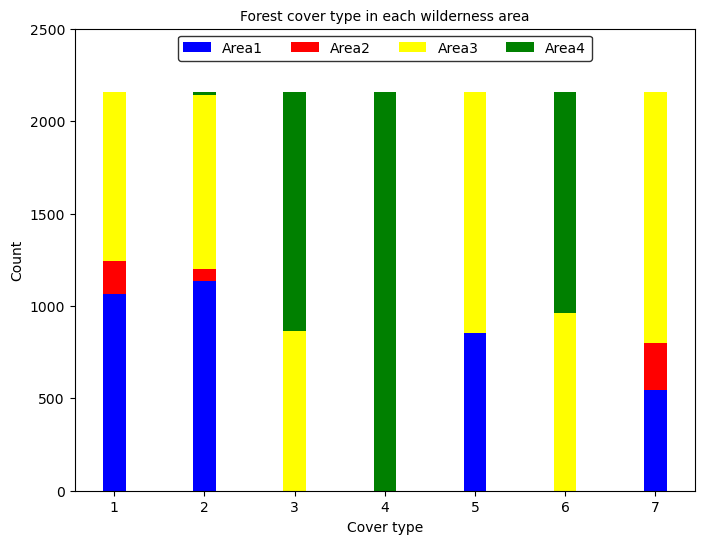

In [6]:
plt.figure(figsize=(8,6))
plt.bar(range(1,8), area1_counts, width=0.25, color='blue', label="Area1")
plt.bar(range(1,8), area2_counts, width=0.25, color='red', label="Area2", bottom=area1_counts)
plt.bar(range(1,8), area3_counts, width=0.25, color='yellow', label="Area3", bottom=area1_counts+area2_counts)
plt.bar(range(1,8), area4_counts, width=0.25, color='green', label="Area4", bottom=area1_counts+area2_counts+area3_counts)
plt.ylim(0,2500)
plt.legend(ncol=4, loc="upper center", frameon=True, edgecolor='k')
plt.title('Forest cover type in each wilderness area', fontsize=10)
plt.xlabel('Cover type', fontsize=10)
plt.ylabel('Count', fontsize=10)

In [7]:
numerical_variables = ["Elevation", "Aspect", "Slope", "Horizontal_Distance_To_Hydrology", 
                       "Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways", 
                       "Horizontal_Distance_To_Fire_Points", "Hillshade_9am", "Hillshade_Noon",
                       "Hillshade_3pm"
                      ]

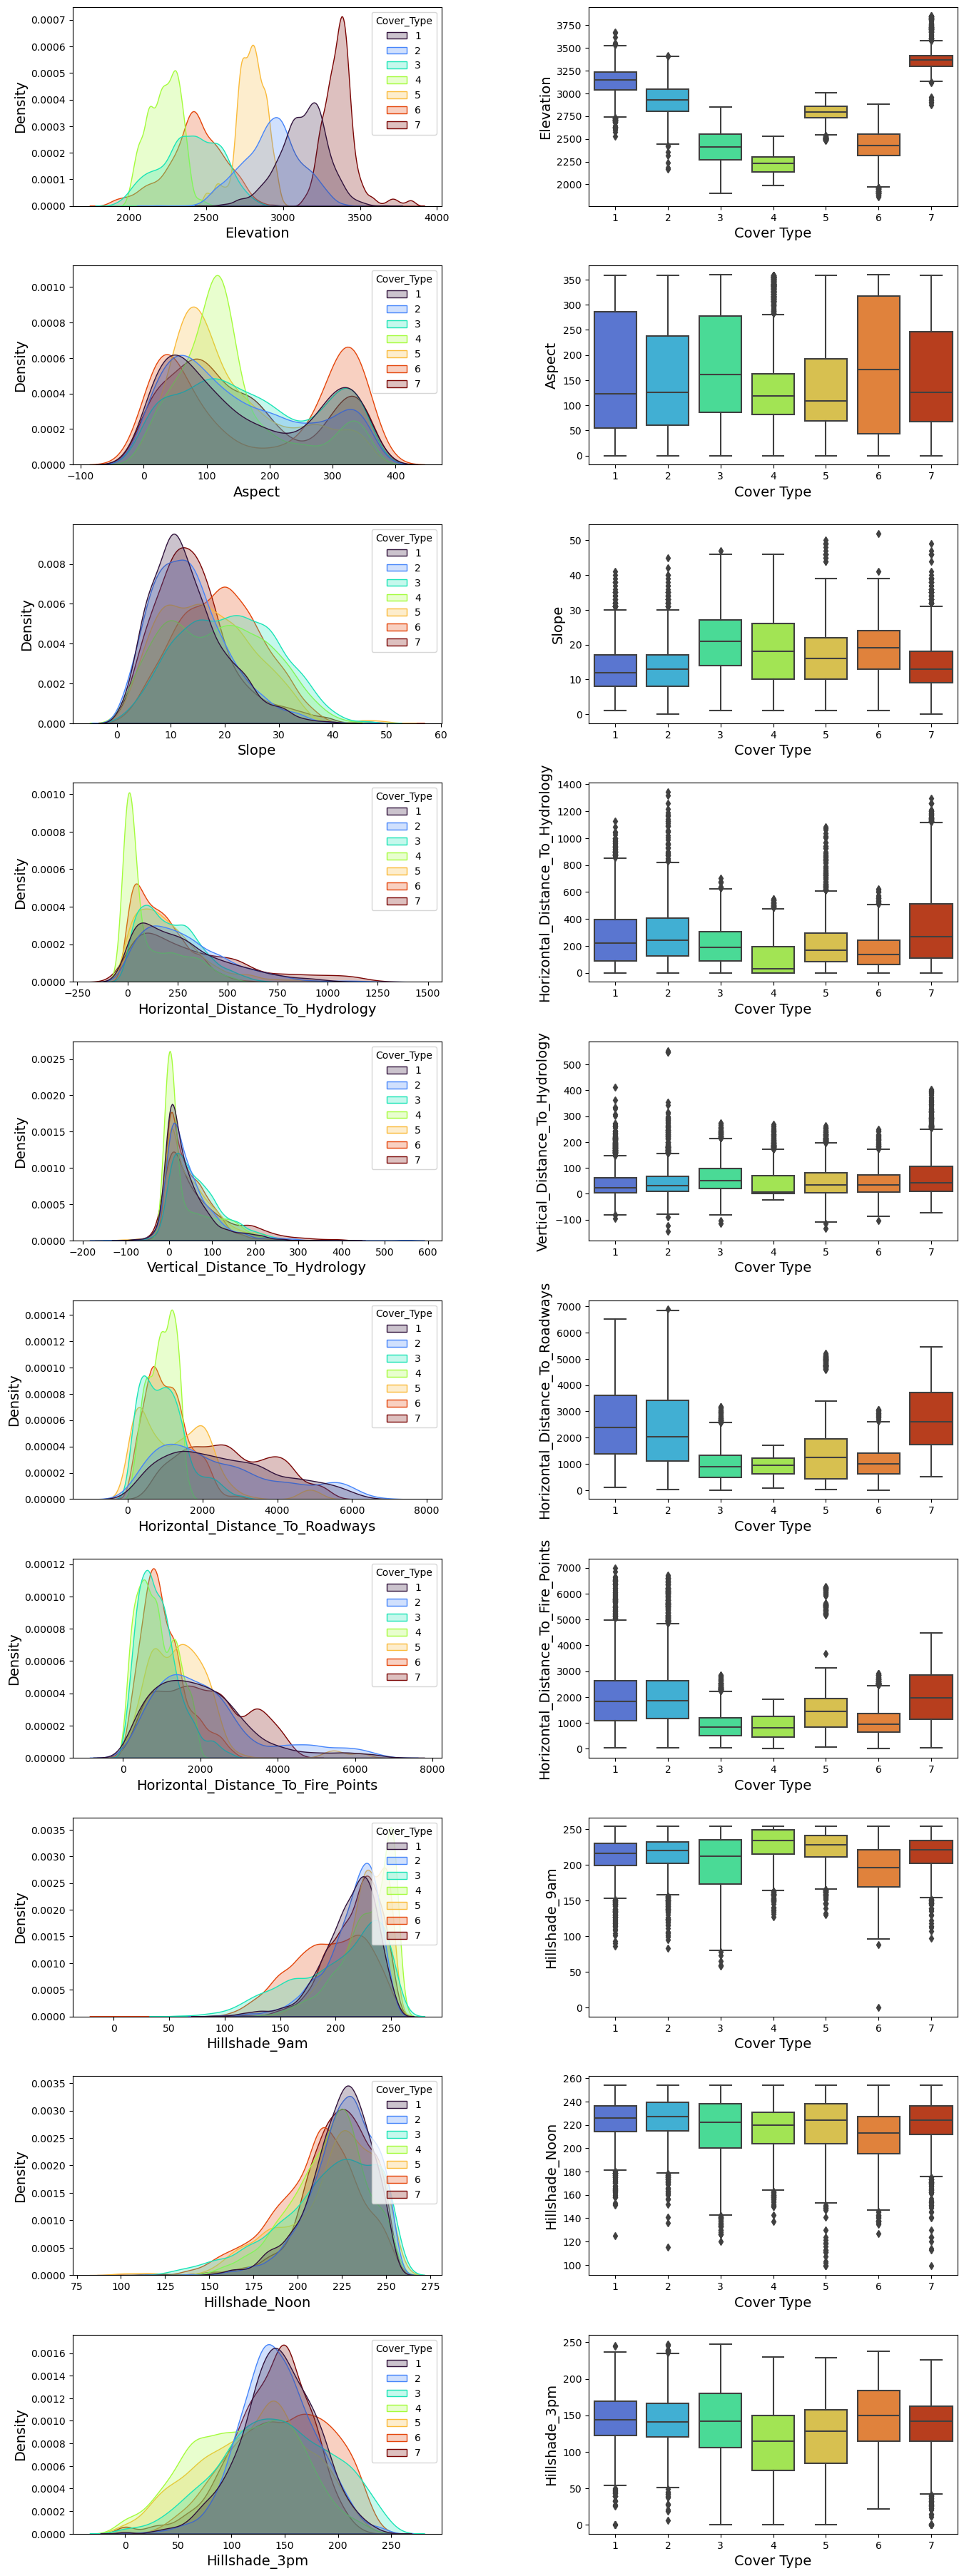

In [8]:
fig, axs = plt.subplots(10, 2, figsize=(16,46))

for i in range(len(numerical_variables)):
    sns.kdeplot(data=df, x=numerical_variables[i], hue='Cover_Type', ax=axs[i][0], palette='turbo', fill=True)
    sns.boxplot(data=df, y=numerical_variables[i], x='Cover_Type', ax=axs[i][1], palette='turbo')
    
    axs[i][0].set_xlabel(numerical_variables[i], fontsize=14)
    axs[i][1].set_ylabel(numerical_variables[i], fontsize=14)
    axs[i][1].set_xlabel('Cover Type', fontsize=14)
    axs[i][0].set_ylabel('Density', fontsize=14)
    
plt.subplots_adjust(wspace=0.4, hspace=0.3)
plt.show()

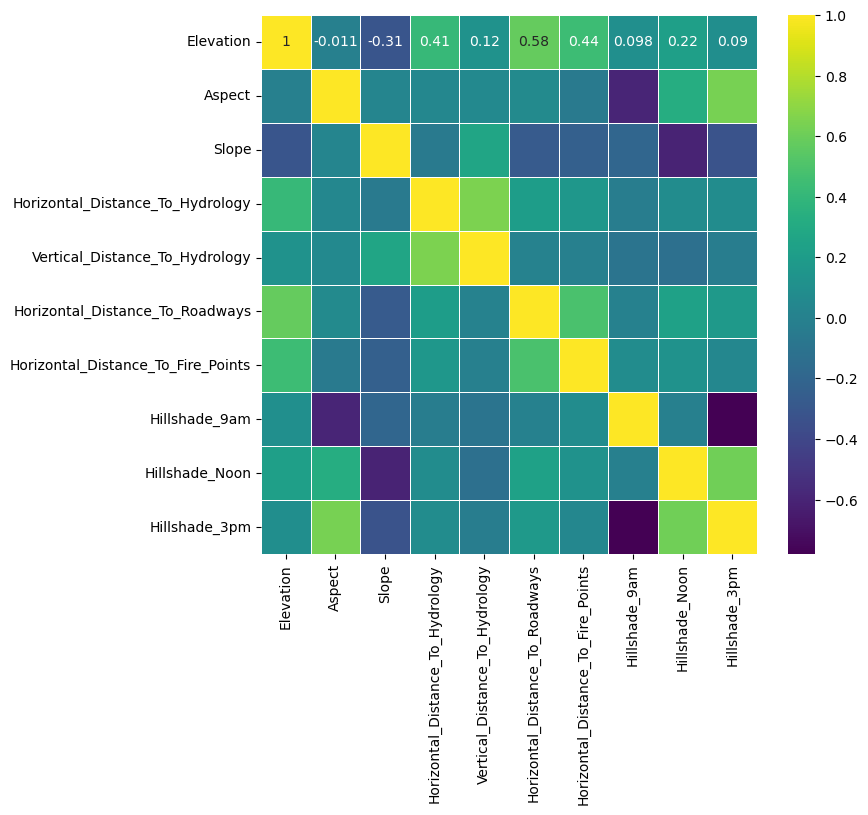

In [9]:
plt.figure(figsize=(8,7))
corr = df[numerical_variables].corr()
sns.heatmap(corr, xticklabels=numerical_variables, yticklabels=numerical_variables, 
            linewidths=0.5, cmap='viridis', annot=True)
plt.show()

In [10]:
X = df.drop('Cover_Type', axis=1)
y = df['Cover_Type']

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [12]:
x_train.shape,x_test.shape

((12096, 53), (3024, 53))

In [13]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV


In [14]:
preprocessor = Pipeline(
    steps=[('imputer', SimpleImputer()),
           ('scaler', StandardScaler())
    ]
)

In [15]:
x_train = preprocessor.fit_transform(x_train)
x_test = preprocessor.transform(x_test)

In [16]:
def eveluate_M(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    
    train_rep = classification_report(y_train,model.predict(x_train))
    test_rep = classification_report(y_test,model.predict(x_test))
    return train_rep,test_rep

In [17]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='l2', C=10)
tr_acc, tst_acc = eveluate_M(log_reg,x_train,x_test,y_train,y_test)
print(f'Train report:\n{tr_acc}\nTest report:\n{tst_acc}')

Train report:
              precision    recall  f1-score   support

           1       0.66      0.67      0.67      1739
           2       0.63      0.53      0.57      1722
           3       0.64      0.56      0.59      1732
           4       0.81      0.88      0.84      1711
           5       0.73      0.81      0.77      1744
           6       0.62      0.66      0.64      1728
           7       0.88      0.89      0.88      1720

    accuracy                           0.71     12096
   macro avg       0.71      0.71      0.71     12096
weighted avg       0.71      0.71      0.71     12096

Test report:
              precision    recall  f1-score   support

           1       0.67      0.69      0.68       421
           2       0.65      0.54      0.59       438
           3       0.63      0.53      0.57       428
           4       0.77      0.87      0.82       449
           5       0.71      0.81      0.76       416
           6       0.62      0.64      0.63       4

In [18]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [19]:
from sklearn.neighbors import KNeighborsClassifier
parameter = [{
    'n_neighbors': [6,5,4,3], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'weights': ['uniform', 'distance'], 'p': [1,2], 'leaf_size': [10,20,30,40,50]
}]
grid_kn = GridSearchCV(KNeighborsClassifier(), parameter, scoring='accuracy', n_jobs=-1,
                   cv=5, verbose=1)
tr_acc, tst_acc = eveluate_M(grid_kn,x_train,x_test,y_train,y_test)
print(f'Train report:\n{tr_acc}\nTest report:\n{tst_acc}')

Fitting 5 folds for each of 320 candidates, totalling 1600 fits
Train report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1739
           2       1.00      1.00      1.00      1722
           3       1.00      1.00      1.00      1732
           4       1.00      1.00      1.00      1711
           5       1.00      1.00      1.00      1744
           6       1.00      1.00      1.00      1728
           7       1.00      1.00      1.00      1720

    accuracy                           1.00     12096
   macro avg       1.00      1.00      1.00     12096
weighted avg       1.00      1.00      1.00     12096

Test report:
              precision    recall  f1-score   support

           1       0.74      0.68      0.71       421
           2       0.74      0.63      0.68       438
           3       0.78      0.72      0.75       428
           4       0.87      0.96      0.91       449
           5       0.81      0.92      0.

In [20]:
grid_kn.best_params_

{'algorithm': 'auto',
 'leaf_size': 10,
 'n_neighbors': 4,
 'p': 1,
 'weights': 'distance'}

In [21]:
parameter = [{
    'n_estimators': [50, 100, 150, 200], 'learning_rate': [0.1, 0.2, 0.3]
}]
grid_ada = GridSearchCV(AdaBoostClassifier(), parameter, verbose=1, scoring='accuracy', n_jobs=-1)
tr_acc, tst_acc = eveluate_M(grid_ada,x_train,x_test,y_train,y_test)
print(f'Train report:\n{tr_acc}\nTest report:\n{tst_acc}')
grid_ada.best_params_

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Train report:
              precision    recall  f1-score   support

           1       0.39      0.71      0.51      1739
           2       0.23      0.20      0.22      1722
           3       0.42      0.48      0.45      1732
           4       0.00      0.00      0.00      1711
           5       0.64      0.81      0.72      1744
           6       0.40      0.74      0.52      1728
           7       0.00      0.00      0.00      1720

    accuracy                           0.42     12096
   macro avg       0.30      0.42      0.34     12096
weighted avg       0.30      0.42      0.35     12096

Test report:
              precision    recall  f1-score   support

           1       0.37      0.71      0.49       421
           2       0.23      0.19      0.21       438
           3       0.42      0.50      0.46       428
           4       0.00      0.00      0.00       449
           5       0.60      0.81      0.69 

{'learning_rate': 0.2, 'n_estimators': 100}

In [22]:
from xgboost import XGBClassifier
params_xgb = {'max_depth':[4, 6, 8, 10],
              'n_estimators': [50, 100, 200, 300],
              'learning_rate': [0.1, 0.2, 0.3] 
             }
grid_xgb = GridSearchCV(XGBClassifier(), params_xgb, scoring='accuracy', cv=5, verbose=1, error_score='raise')
tr_acc, tst_acc = eveluate_M(grid_xgb,x_train,x_test,y_train-1,y_test-1)
print(f'Train report:\n{tr_acc}\nTest report:\n{tst_acc}')
grid_xgb.best_params_

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Train report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1739
           1       1.00      1.00      1.00      1722
           2       1.00      1.00      1.00      1732
           3       1.00      1.00      1.00      1711
           4       1.00      1.00      1.00      1744
           5       1.00      1.00      1.00      1728
           6       1.00      1.00      1.00      1720

    accuracy                           1.00     12096
   macro avg       1.00      1.00      1.00     12096
weighted avg       1.00      1.00      1.00     12096

Test report:
              precision    recall  f1-score   support

           0       0.83      0.80      0.82       421
           1       0.82      0.74      0.78       438
           2       0.90      0.88      0.89       428
           3       0.95      0.98      0.96       449
           4       0.91      0.96      0.94

{'learning_rate': 0.2, 'max_depth': 8, 'n_estimators': 300}

In [23]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_train)

PCA()

In [24]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

42

In [26]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=d, kernel='rbf', gamma=0.04)
x_train_red = kpca.fit_transform(x_train)
x_test_red = kpca.transform(x_test)

In [27]:
tr_acc, tst_acc = eveluate_M(XGBClassifier(learning_rate=0.2, max_depth=8, n_estimators=300),
                             x_train_red,x_test_red,y_train-1,y_test-1)
print(f'Train report:\n{tr_acc}\nTest report:\n{tst_acc}')

Train report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1739
           1       1.00      1.00      1.00      1722
           2       1.00      1.00      1.00      1732
           3       1.00      1.00      1.00      1711
           4       1.00      1.00      1.00      1744
           5       1.00      1.00      1.00      1728
           6       1.00      1.00      1.00      1720

    accuracy                           1.00     12096
   macro avg       1.00      1.00      1.00     12096
weighted avg       1.00      1.00      1.00     12096

Test report:
              precision    recall  f1-score   support

           0       0.70      0.69      0.70       421
           1       0.69      0.62      0.65       438
           2       0.71      0.70      0.71       428
           3       0.87      0.93      0.90       449
           4       0.83      0.87      0.85       416
           5       0.73      0.72      0.73       4

In [28]:
tr_acc, tst_acc = eveluate_M(KNeighborsClassifier(algorithm='auto', leaf_size=10, n_neighbors=4, p=1, weights='distance'),
                             x_train_red,x_test_red,y_train,y_test)
print(f'Train report:\n{tr_acc}\nTest report:\n{tst_acc}')

Train report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1739
           2       1.00      1.00      1.00      1722
           3       1.00      1.00      1.00      1732
           4       1.00      1.00      1.00      1711
           5       1.00      1.00      1.00      1744
           6       1.00      1.00      1.00      1728
           7       1.00      1.00      1.00      1720

    accuracy                           1.00     12096
   macro avg       1.00      1.00      1.00     12096
weighted avg       1.00      1.00      1.00     12096

Test report:
              precision    recall  f1-score   support

           1       0.70      0.67      0.69       421
           2       0.71      0.57      0.63       438
           3       0.67      0.64      0.65       428
           4       0.83      0.91      0.87       449
           5       0.77      0.88      0.82       416
           6       0.68      0.69      0.68       4

In [32]:
# Without apply PCA
from sklearn.ensemble import GradientBoostingClassifier
param_grad = {'learning_rate': [0.3, 0.4, 0.5], 
    'n_estimators': [50, 100, 130, 150, 170, 200],
    'max_depth': [2, 3, 4, 5], 'max_features': ['sqrt', 'log2']
}
grid_grad = GridSearchCV(GradientBoostingClassifier(), param_grad, scoring='accuracy', cv=5, verbose=1, error_score='raise')
tr_acc, tst_acc = eveluate_M(grid_grad,x_train,x_test,y_train,y_test)
print(f'Train report:\n{tr_acc}\nTest report:\n{tst_acc}')
grid_grad.best_params_

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Train report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1739
           1       1.00      1.00      1.00      1722
           2       1.00      1.00      1.00      1732
           3       1.00      1.00      1.00      1711
           4       1.00      1.00      1.00      1744
           5       1.00      1.00      1.00      1728
           6       1.00      1.00      1.00      1720

    accuracy                           1.00     12096
   macro avg       1.00      1.00      1.00     12096
weighted avg       1.00      1.00      1.00     12096

Test report:
              precision    recall  f1-score   support

           0       0.79      0.76      0.77       421
           1       0.78      0.71      0.75       438
           2       0.86      0.86      0.86       428
           3       0.96      0.97      0.97       449
           4       0.90      0.94      0.9

{'learning_rate': 0.3,
 'max_depth': 5,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [82]:
grad = GradientBoostingClassifier(n_estimators=350, learning_rate=0.3, max_depth=5, max_features='sqrt')
tr_acc, tst_acc = eveluate_M(grad,x_train,x_test,y_train,y_test)
print(f'Train report:\n{tr_acc}\nTest report:\n{tst_acc}')

Train report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1739
           2       1.00      1.00      1.00      1722
           3       1.00      1.00      1.00      1732
           4       1.00      1.00      1.00      1711
           5       1.00      1.00      1.00      1744
           6       1.00      1.00      1.00      1728
           7       1.00      1.00      1.00      1720

    accuracy                           1.00     12096
   macro avg       1.00      1.00      1.00     12096
weighted avg       1.00      1.00      1.00     12096

Test report:
              precision    recall  f1-score   support

           1       0.80      0.78      0.79       421
           2       0.80      0.74      0.77       438
           3       0.89      0.85      0.87       428
           4       0.95      0.98      0.96       449
           5       0.91      0.96      0.93       416
           6       0.87      0.92      0.89       4

In [83]:
# learning_rate': 0.2, 'max_depth': 8, 'n_estimators': 300
tr_acc, tst_acc = eveluate_M(XGBClassifier(learning_rate=0.2, max_depth=8, n_estimators=350),
                             x_train,x_test,y_train-1,y_test-1)
print(f'Train report:\n{tr_acc}\nTest report:\n{tst_acc}')

Train report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1739
           1       1.00      1.00      1.00      1722
           2       1.00      1.00      1.00      1732
           3       1.00      1.00      1.00      1711
           4       1.00      1.00      1.00      1744
           5       1.00      1.00      1.00      1728
           6       1.00      1.00      1.00      1720

    accuracy                           1.00     12096
   macro avg       1.00      1.00      1.00     12096
weighted avg       1.00      1.00      1.00     12096

Test report:
              precision    recall  f1-score   support

           0       0.84      0.81      0.82       421
           1       0.83      0.74      0.78       438
           2       0.90      0.88      0.89       428
           3       0.95      0.98      0.96       449
           4       0.91      0.96      0.94       416
           5       0.91      0.94      0.93       4

In [98]:
from sklearn.ensemble import HistGradientBoostingClassifier
param_Hgrad = {
    'learning_rate': [0.2, 0.3, 0.4, 0.5], 'interaction_cst': ['pairwise', 'no_interactions'], 
}

grid_Hgrad = GridSearchCV(HistGradientBoostingClassifier(verbose=1, warm_start=True), 
                          param_Hgrad, n_jobs=-1, scoring='accuracy', cv=5)
tr_acc, tst_acc = eveluate_M(grid_Hgrad,x_train,x_test,y_train,y_test)
print(f'Train report:\n{tr_acc}\nTest report:\n{tst_acc}')
grid_Hgrad.best_params_

Binning 0.005 GB of training data: 0.031 s
Binning 0.001 GB of validation data: 0.002 s
Fitting gradient boosted rounds:
[1/100] 7 trees, 205 leaves (29 on avg), max depth = 10, train loss: 1.08838, val loss: 1.14262, in 0.067s
[2/100] 7 trees, 217 leaves (31 on avg), max depth = 12, train loss: 0.82970, val loss: 0.90335, in 0.056s
[3/100] 7 trees, 217 leaves (31 on avg), max depth = 14, train loss: 0.71111, val loss: 0.80734, in 0.082s
[4/100] 7 trees, 217 leaves (31 on avg), max depth = 13, train loss: 0.63248, val loss: 0.74433, in 0.053s
[5/100] 7 trees, 217 leaves (31 on avg), max depth = 17, train loss: 0.58755, val loss: 0.70689, in 0.054s
[6/100] 7 trees, 217 leaves (31 on avg), max depth = 16, train loss: 0.53639, val loss: 0.66574, in 0.054s
[7/100] 7 trees, 217 leaves (31 on avg), max depth = 13, train loss: 0.50425, val loss: 0.64906, in 0.056s
[8/100] 7 trees, 204 leaves (29 on avg), max depth = 14, train loss: 0.47752, val loss: 0.62845, in 0.049s
[9/100] 7 trees, 217 le

{'interaction_cst': 'pairwise', 'learning_rate': 0.4}

In [101]:
from sklearn.ensemble import ExtraTreesClassifier
param_Ext_tree = {
    'n_estimators': [50, 100, 130, 150, 170, 200], 'criterion': ['gini', 'entropy', 'log_loss'],
    'max_features': ['sqrt', 'log2']
}
grid_Ext_tree = GridSearchCV(ExtraTreesClassifier(bootstrap=True, oob_score=True, warm_start=True), param_Ext_tree,
                             verbose=1, n_jobs=-1, scoring='accuracy', cv=5)
tr_acc, tst_acc = eveluate_M(grid_Ext_tree,x_train,x_test,y_train,y_test)
print(f'Train report:\n{tr_acc}\nTest report:\n{tst_acc}')
# grid_Hgrad.best_params_

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Train report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1739
           2       1.00      1.00      1.00      1722
           3       1.00      1.00      1.00      1732
           4       1.00      1.00      1.00      1711
           5       1.00      1.00      1.00      1744
           6       1.00      1.00      1.00      1728
           7       1.00      1.00      1.00      1720

    accuracy                           1.00     12096
   macro avg       1.00      1.00      1.00     12096
weighted avg       1.00      1.00      1.00     12096

Test report:
              precision    recall  f1-score   support

           1       0.78      0.78      0.78       421
           2       0.82      0.70      0.76       438
           3       0.86      0.82      0.84       428
           4       0.91      0.98      0.95       449
           5       0.89      0.96      0.92

{'interaction_cst': 'pairwise', 'learning_rate': 0.4}

In [102]:
grid_Ext_tree.best_params_

{'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 130}

In [104]:
from sklearn.ensemble import BaggingClassifier
bag_ext = BaggingClassifier(ExtraTreesClassifier(criterion='entropy', max_features='sqrt'), n_estimators=130, verbose=1)
tr_acc, tst_acc = eveluate_M(bag_ext,x_train,x_test,y_train,y_test)
print(f'Train report:\n{tr_acc}\nTest report:\n{tst_acc}')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Train report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1739
           2       1.00      1.00      1.00      1722
           3       1.00      1.00      1.00      1732
           4       1.00      1.00      1.00      1711
           5       1.00      1.00      1.00      1744
           6       1.00      1.00      1.00      1728
           7       1.00      1.00      1.00      1720

    accuracy                           1.00     12096
   macro avg       1.00      1.00      1.00     12096
weighted avg       1.00      1.00      1.00     12096

Test report:
              precision    recall  f1-score   support

           1       0.80      0.78      0.79       421
           2       0.81      0.71      0.75       438
           3       0.87      0.84      0.85       428
           4       0.91      0.98      0.95       449
           5       0.89      0.94      0.92       416
           6       0.87      0.89      0.88       4

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.5min finished


In [125]:
from sklearn.ensemble import VotingClassifier
clf1 = BaggingClassifier(ExtraTreesClassifier(criterion='entropy', max_features='sqrt'), n_estimators=10, verbose=1)
clf2 = ExtraTreesClassifier(n_estimators=130, criterion='entropy', max_features='sqrt')
clf3 = HistGradientBoostingClassifier(interaction_cst='pairwise', learning_rate=0.4)
clf4 = XGBClassifier(learning_rate=0.2, max_depth=8, n_estimators=300)
clf5 = GradientBoostingClassifier(n_estimators=350, learning_rate=0.3, max_depth=5, max_features='sqrt')
clf6 = KNeighborsClassifier(algorithm='auto', leaf_size=10, n_neighbors=4, p=1, weights='distance')
clf7 = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='l2', C=10)
list_clf = [('bagg', clf1), ('Ext', clf2), ('Hgrad', clf3), ('XGB', clf4), ('Grad', clf5), ('KN', clf6), ('log_reg', clf7)]
best_clf = VotingClassifier(estimators=list_clf, voting='hard')
best_clf.fit(x_train, y_train-1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   32.8s finished


VotingClassifier(estimators=[('bagg',
                              BaggingClassifier(estimator=ExtraTreesClassifier(criterion='entropy'),
                                                verbose=1)),
                             ('Ext',
                              ExtraTreesClassifier(criterion='entropy',
                                                   n_estimators=130)),
                             ('Hgrad',
                              HistGradientBoostingClassifier(interaction_cst='pairwise',
                                                             learning_rate=0.4)),
                             ('XGB',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_by...
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=300, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('Grad',
                              GradientBoostingClassifier(learning_rate=0.3,
                                                         max_depth=5,
                                                         max_features='sqrt',
                                                         n_estimators=350)),
                             ('KN',
                              KNeighborsClassifier(leaf_size=10, n_neighbors=4,
                                                   p=1, weights='distance')),
                             ('log_reg',
                              LogisticRegression(C=10,
                                                 multi_class='multinomial'))])

In [126]:
best_clf.score(x_test, y_test-1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.6s finished


0.8816137566137566

In [127]:
best_clf = VotingClassifier(estimators=list_clf, voting='soft')
best_clf.fit(x_train, y_train-1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   33.3s finished


VotingClassifier(estimators=[('bagg',
                              BaggingClassifier(estimator=ExtraTreesClassifier(criterion='entropy'),
                                                verbose=1)),
                             ('Ext',
                              ExtraTreesClassifier(criterion='entropy',
                                                   n_estimators=130)),
                             ('Hgrad',
                              HistGradientBoostingClassifier(interaction_cst='pairwise',
                                                             learning_rate=0.4)),
                             ('XGB',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_by...
                                            multi_strategy=None,
                                            n_estimators=300, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('Grad',
                              GradientBoostingClassifier(learning_rate=0.3,
                                                         max_depth=5,
                                                         max_features='sqrt',
                                                         n_estimators=350)),
                             ('KN',
                              KNeighborsClassifier(leaf_size=10, n_neighbors=4,
                                                   p=1, weights='distance')),
                             ('log_reg',
                              LogisticRegression(C=10,
                                                 multi_class='multinomial'))],
                 voting='soft')

In [128]:
best_clf.score(x_test, y_test-1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.9s finished


0.8878968253968254